<a href="https://colab.research.google.com/github/VishakBharadwaj94/MNIST_mini/blob/master/MNIST_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [0]:
from fastai.metrics import error_rate

In [4]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv')]

In [0]:
data = ImageDataBunch.from_folder(path=path,ds_tfms=get_transforms(do_flip=False),size=24)

In [7]:
data.classes

['3', '7']

In [8]:
data.c

2

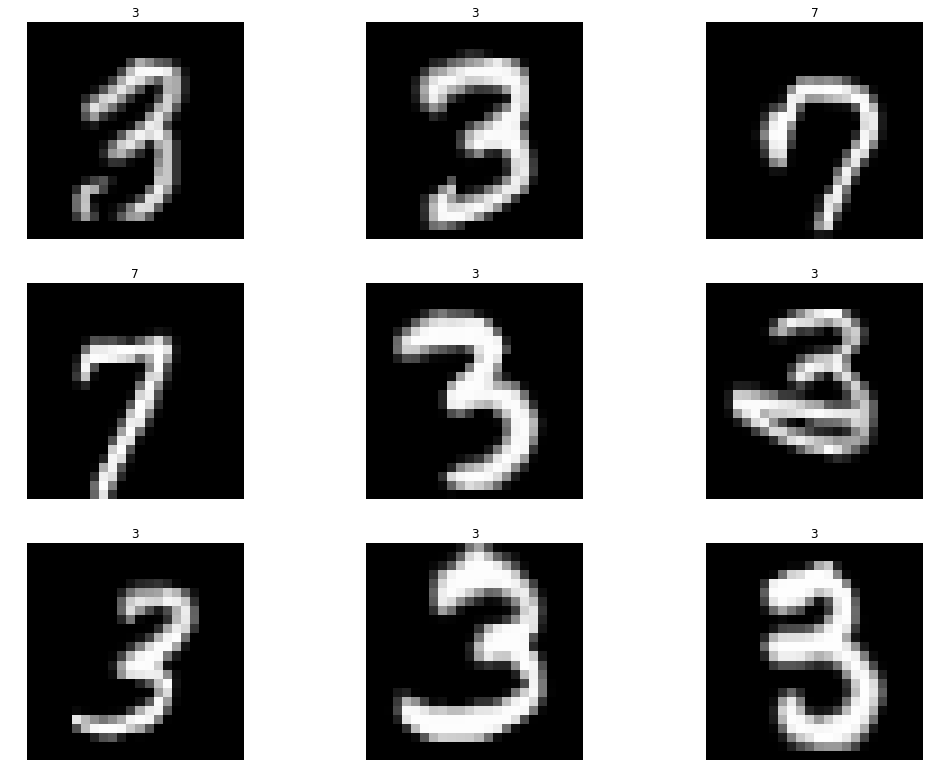

In [9]:
data.show_batch(rows=3,figsize=(15,11))

In [10]:
learn = cnn_learner(data = data,base_arch=models.resnet34,metrics=accuracy)

#pretained model trained on imagenet

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 113474993.89it/s]


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.197714,0.096907,0.962709,00:30
1,0.101840,0.037430,0.986261,00:28
2,0.070159,0.030547,0.990186,00:28
3,0.059596,0.026549,0.991168,00:28


In [0]:
learn.save('level-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

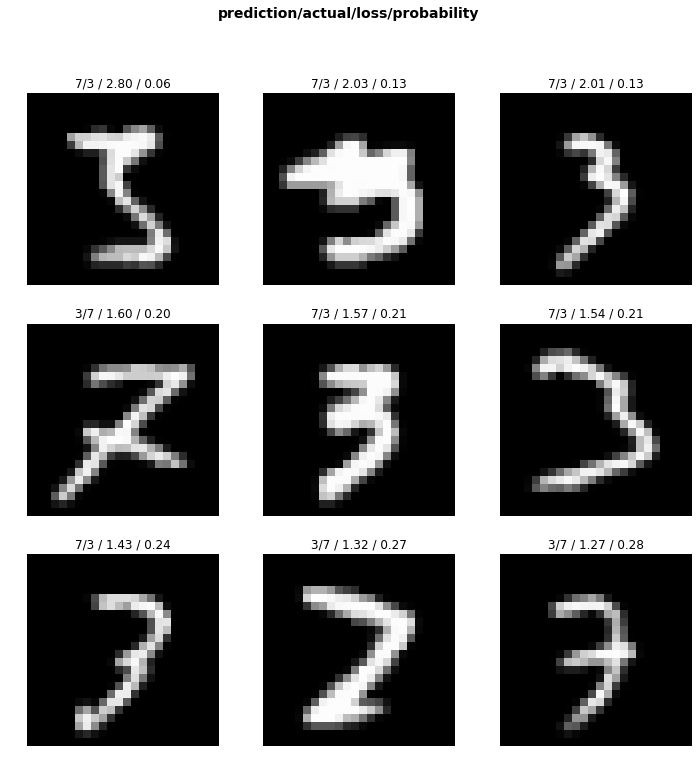

In [14]:
interp.plot_top_losses(9)

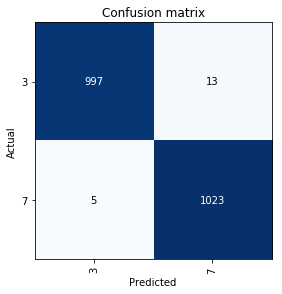

In [15]:
interp.plot_confusion_matrix()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


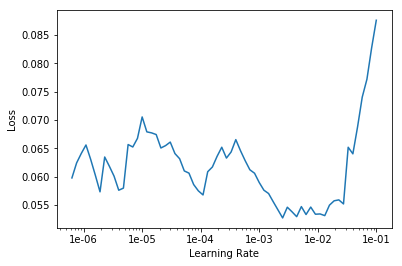

In [17]:
learn.recorder.plot()

In [19]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.020982,0.005608,0.998037,00:30
1,0.008911,0.003358,0.999509,00:30


**The accuracy of the model is presently at 99.95!**